## Mutual Information
Locate features with the most potential.

A great first step to look on a newly dataset is construct a `ranking` with a `feature utility metric`. a function measuring associations between a feature and the target.

Then you can choose a smaller set of the most useful features to develop initially and have more confidence about that features.

This metric is called `mutual information`. Mutual informmation is a lot like the correlation to measure relationship between two quantities.

### Mutual Information
Mutual information describes relationships in terms of uncertainty. The mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other. If you knew the value of a feature, how much more confident would you be about the target?


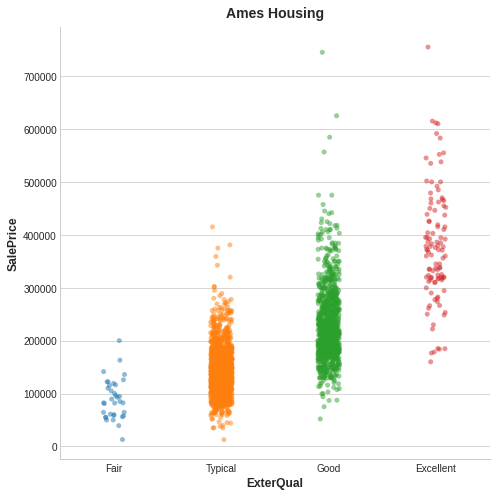

From this relationship figure, we can see that knowing the value of `ExterQual` should make you more certain about the target `SalePrice` to a within range.

## Interpreting MI Scores
The least possible MI is 0.0, when MI is 0, the quantities are independent: neither can tell anything about the other.
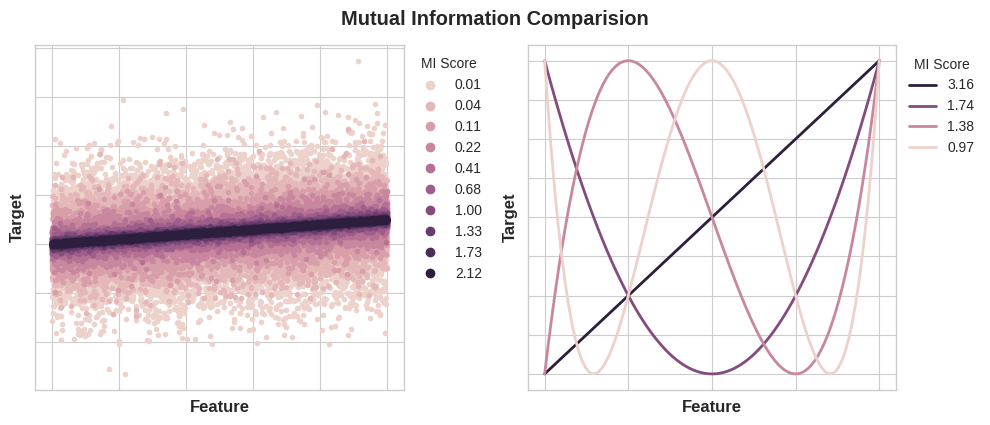
Left: Mutual information increases as the dependence between feature and target becomes tighter. Right: Mutual information can capture any kind of association (not just linear, like correlation.)


- MI can help you to understand the relative potential of a feature as a predictor of the target, considered by itself.
- It's possible for a feature to be very informative when interacting with other features, but not so informative all alone. MI can't detect interactions between features. It is a univariate metric.
- The actual usefulness of a feature depends on the model you use it with. A feature is only useful to the extent that its relationship with the target is one your model can learn. Just because a feature has a high MI score doesn't mean your model will be able to do anything with that information. You may need to transform the feature first to expose the association.


### Examples
Let's working on simple regression case where the model will predict the car's price from 23 features.

#### Note: 
As rule of thumb, anything that must have a `float` dtype is not a discrete. Categoricals (object or categorial dtype) can be treated as discrete by giving them a label encoding.

```python
X = df.copy()
y = X.pop("price") # Target

## Label encoding for cateogrical
for column in X.select_dtypes("object"):
    X[column], _ = X[column].factorize()

## All discrete featuers should now have integer dtypes
discrete_features = X.dtypes == int
```


Scikit-learn has two mutual information metrics in its feature_selection module: one for real-valued targets (`mutual_info_regression`) and one for categorical targets (`mutual_info_classif`). Our target, price, is real-valued.
```python
from sklearn.feature_selection import mutual_info_regression

def make_mi_score(X, y, discrete_features):
    mi_scores = mutual_info_regresion(X, y, discrete_features = discrete_features)
    mi_scores = pd.Series(mi_scores, name="Mi Scores", index = X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores
